In [1]:
import convokit

In [2]:
corpus = convokit.Corpus(filename=convokit.download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/Documents/GitHub/Cornell-Conversational-Analysis-Toolkit/convokit/tensors/reddit-corpus-small


Let's get the fighting words for r/Christianity and r/atheism:

In [3]:
fw = convokit.FightingWords(ngram_range=(1,1))

Initializing default CountVectorizer with ngram_range (1, 1)... Done.


In [4]:
fw.fit(corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'Christianity', 
               class2_func=lambda utt: utt.meta['subreddit'] == "atheism",)

class1_func returned 2659 valid utterances. class2_func returned 2736 valid utterances.
Vocab size is 2054
Comparing language...
ngram zscores computed.


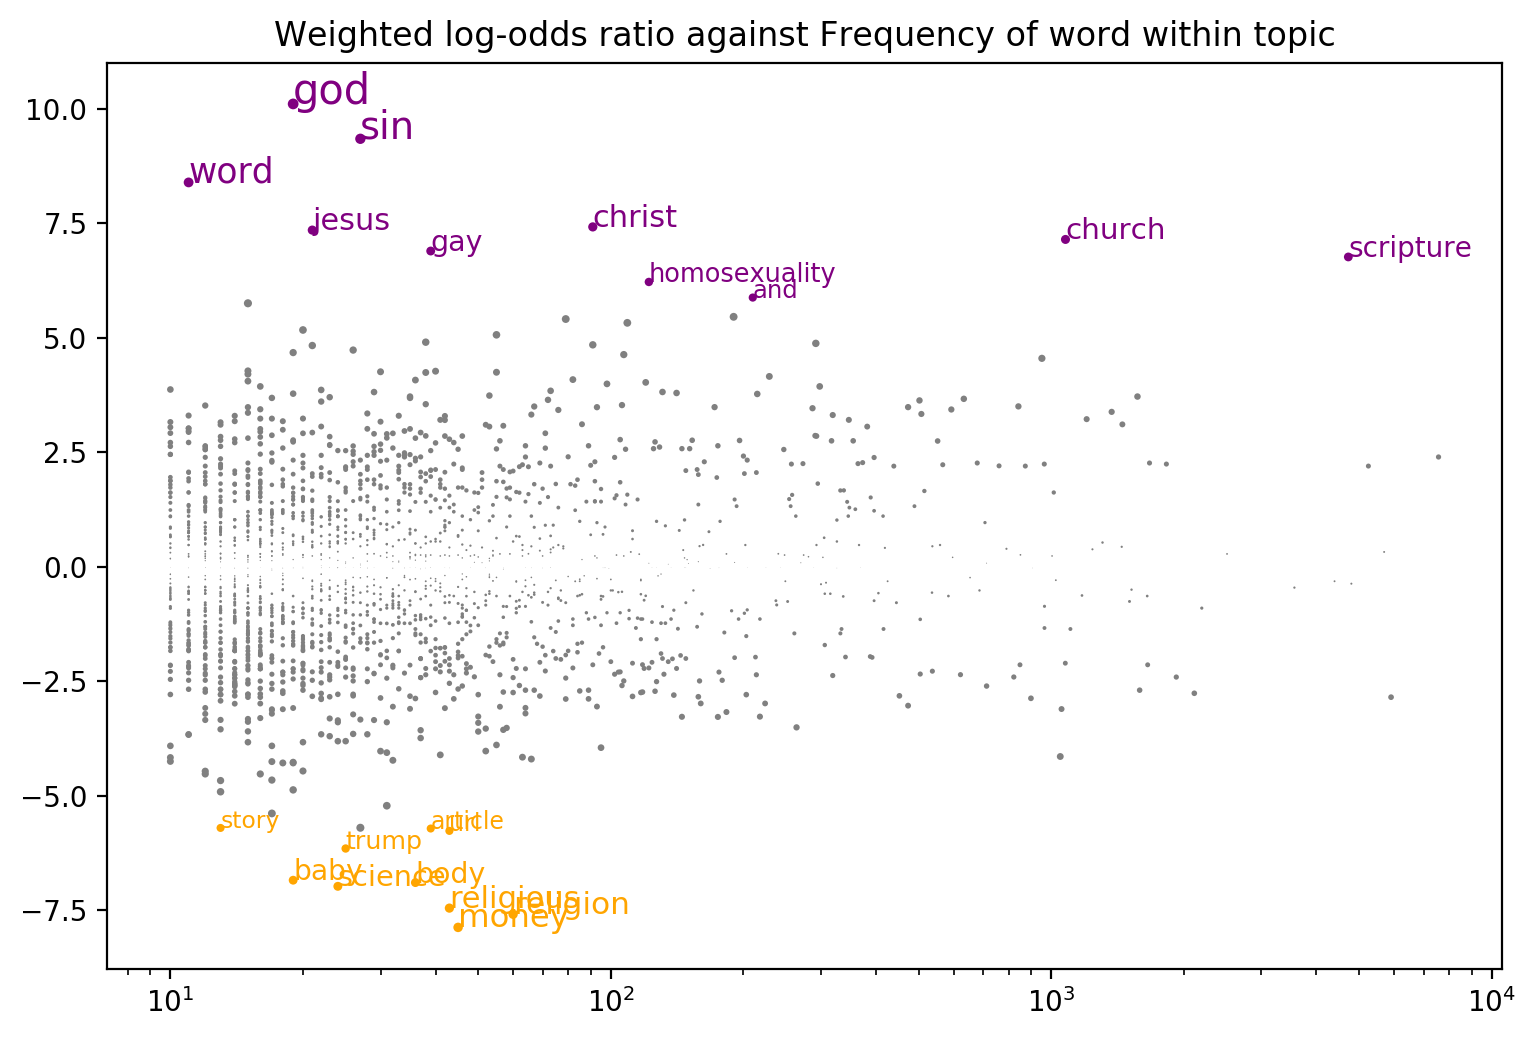

In [5]:
df = fw.summarize(corpus, plot=True)

In [6]:
df

,z-score,class
ngram,,
money,-7.869706,class2
religion,-7.583862,class2
religious,-7.448927,class2
science,-6.973271,class2
body,-6.891924,class2
baby,-6.839824,class2
trump,-6.147888,class2
url,-5.763271,class2
article,-5.711645,class2


In [7]:
c1, c2 = fw.get_ngrams_past_threshold()

In [8]:
c1[:10]

['god',
 'sin',
 'word',
 'christ',
 'jesus',
 'church',
 'gay',
 'scripture',
 'homosexuality',
 'and']

In [9]:
df.head()

,z-score,class
ngram,,
money,-7.869706,class2
religion,-7.583862,class2
religious,-7.448927,class2
science,-6.973271,class2
body,-6.891924,class2


In [12]:
df.tail(10)

,z-score,class
ngram,,
and,5.878452,class1
homosexuality,6.219228,class1
scripture,6.764903,class1
gay,6.894390,class1
church,7.147289,class1
jesus,7.350807,class1
christ,7.420763,class1
word,8.391863,class1
sin,9.344141,class1


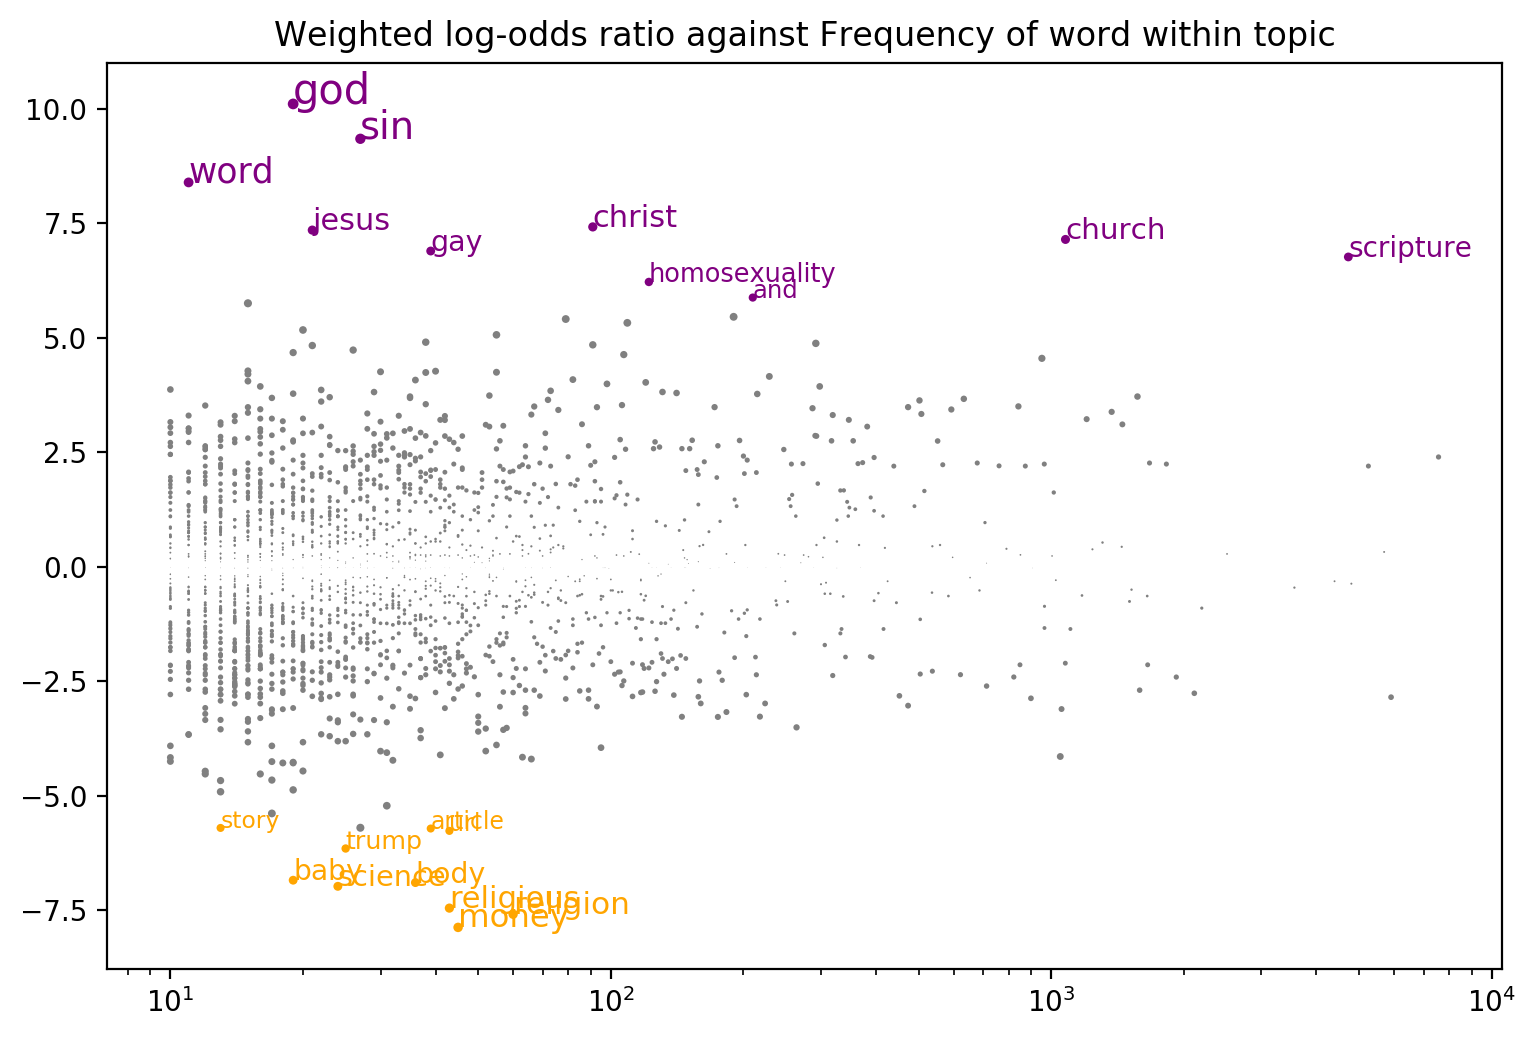

In [13]:
fw.plot_fighting_words()

In [ ]:
# Words that are more typical of r/Christianity

In [14]:
fw.get_zscore("love")

5.458235491414579

In [15]:
fw.get_zscore("forgive")

2.0362185312810253

In [16]:
fw.get_zscore("repent")

3.2087981017819183

In [17]:
fw.get_zscore("marriage")

2.3709572119803486

In [18]:
# Words that are more typical of r/atheism

In [19]:
fw.get_zscore("government")

-4.280239914371208

In [20]:
fw.get_zscore("state")

-3.5911735907573004

In [21]:
fw.get_zscore("separation")

-2.0834134084794282

In [22]:
fw.get_zscore('education')

-3.8053148701485986

In [23]:
fw.get_zscore('morals')

-2.2769976481460232

In [24]:
fw.annot_method

'top_k'

In [25]:
fw.transform(corpus)

In [26]:
list(fw.get_top_k_ngrams()[0])

['god',
 'sin',
 'word',
 'christ',
 'jesus',
 'church',
 'gay',
 'scripture',
 'homosexuality',
 'and']

In [27]:
for utt in corpus.iter_utterances():
    if utt.meta["subreddit"] in ["atheism", "Christianity"]:
        if len(utt.meta['fighting_words_class1']) > 0:
            print(utt.meta['subreddit'])
            print(utt.meta['fighting_words_class1'])
            print(utt.meta['fighting_words_class2'])
            print(utt.text)
            break

Christianity
['sin', 'church', 'and']
['religion', 'religious']
Parents are strict, Orthodox and religious. Father is a priest. I was born in a country where the majority were Orthodox so I've grown up with faith. We moved to American a decade ago and it's been the same since.


But now, I feel so disillusioned. I feel so guilty about this but I simply don't believe in God like I used to. I despise going to church because of how strict it is. My whole family has to get up at 4am and attend church from 5am-10am. Not only that, but we have to stand 95% of the time. Every Sunday, I'm exhausted, bored out of my mind because it's in a language I don't understand and self conscious whenever I sit.


I don't know if it's just me losing faith or if I just *really* dislike my church environment. What I wouldn't give to go to a church in the afternoon or late morning with a 2 hour service where I could sit....but I can't even bring it up to my parents because they would 110% take it as a betraya